In [1]:
# Step 1: Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [3]:
# Step 2: Loading Dataset
california_housing = fetch_california_housing()

X = pd.DataFrame(
    california_housing.data,
    columns=california_housing.feature_names
)

y = pd.Series(california_housing.target)

print(X)
print(y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

In [4]:
# Step 3: Selecting Features for Visualization
X = X[['MedInc', 'AveRooms']]

print(X)

       MedInc  AveRooms
0      8.3252  6.984127
1      8.3014  6.238137
2      7.2574  8.288136
3      5.6431  5.817352
4      3.8462  6.281853
...       ...       ...
20635  1.5603  5.045455
20636  2.5568  6.114035
20637  1.7000  5.205543
20638  1.8672  5.329513
20639  2.3886  5.254717

[20640 rows x 2 columns]


In [5]:
# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

X_train:         MedInc  AveRooms
14196  3.2596  5.017657
8267   3.8125  4.473545
17445  4.1563  5.645833
14265  1.9425  4.002817
2271   3.5542  6.268421
...       ...       ...
11284  6.3700  6.129032
11964  3.0500  6.868597
5390   2.9344  3.986717
860    5.7192  6.395349
15795  2.5755  3.402576

[16512 rows x 2 columns]
X_test:         MedInc  AveRooms
20046  1.6812  4.192201
3024   2.5313  5.039384
15663  3.4801  3.977155
20484  5.7376  6.163636
9814   3.7250  5.492991
...       ...       ...
15362  4.6050  7.002212
16623  2.7266  6.131915
18086  9.2298  7.237676
2144   2.7850  5.289030
3665   3.5521  3.988839

[4128 rows x 2 columns]
y_train:  14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Length: 16512, dtype: float64
y_test:  20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
1808

In [6]:
# Step 5: Initializing and Training Model
model = LinearRegression()

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Step 6: Making Predictions
y_pred = model.predict(X_test)

print(y_pred)

[1.16230214 1.49913482 1.95573059 ... 4.33311942 1.59978552 1.98667198]


/Volumes/MacDrive_Ex/Code/machine learning/w3s_ml/.w3s_ml_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


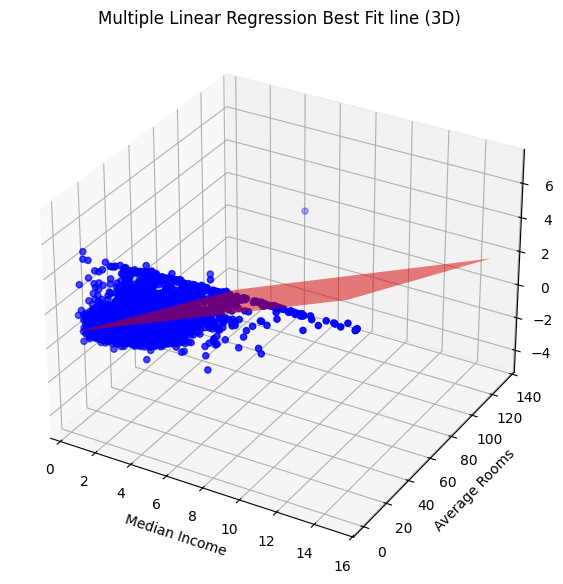

In [11]:
# Step 7: Visualizing Best Fit Line in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(
    111,
    projection='3d'
)

ax.scatter(
    X_test['MedInc'],
    X_test['AveRooms'],
    y_test,
    color='blue',
    label='Actual data'
)


x1_range = np.linspace(
    X_test['MedInc'].min(),
    X_test['MedInc'].max(),
    100
)

x2_range = np.linspace(
    X_test['AveRooms'].min(),
    X_test['AveRooms'].max(),
    100
)

x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(
    np.c_[x1.ravel(), x2.ravel()]
).reshape(x1.shape)

ax.plot_surface(
    x1,
    x2,
    z,
    color='red',
    alpha=0.5,
    rstride=100,
    cstride=100
)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit line (3D)')

plt.show()